In [ ]:
import numpy as np
import os
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
data=pd.read_csv('pysicalinfo.csv', encoding='euc-kr', low_memory=False)
data = data[['가슴 둘레 센티미터', '소매길이 센티미터', '신장 센티미터', '허리 둘레 센티미터', '샅높이 센티미터', '머리 둘레 센티미터', '발 길이 센티미터', '몸무게 킬로그램']]
data.head()

,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167980 entries, 0 to 167979
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   가슴 둘레 센티미터  167980 non-null  float64
 1   소매길이 센티미터   167980 non-null  float64
 2   신장 센티미터     167980 non-null  float64
 3   허리 둘레 센티미터  167980 non-null  object 
 4   샅높이 센티미터    167980 non-null  float64
 5   머리 둘레 센티미터  167980 non-null  float64
 6   발 길이 센티미터   167980 non-null  float64
 7   몸무게 킬로그램    167980 non-null  float64
dtypes: float64(7), object(1)
memory usage: 10.3+ MB


In [ ]:
data=data.apply(pd.to_numeric, errors='coerce')
data.head()

,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167980 entries, 0 to 167979
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   가슴 둘레 센티미터  167980 non-null  float64
 1   소매길이 센티미터   167980 non-null  float64
 2   신장 센티미터     167980 non-null  float64
 3   허리 둘레 센티미터  135669 non-null  float64
 4   샅높이 센티미터    167980 non-null  float64
 5   머리 둘레 센티미터  167980 non-null  float64
 6   발 길이 센티미터   167980 non-null  float64
 7   몸무게 킬로그램    167980 non-null  float64
dtypes: float64(8)
memory usage: 10.3 MB


In [ ]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135669 entries, 0 to 135668
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   가슴 둘레 센티미터  135669 non-null  float64
 1   소매길이 센티미터   135669 non-null  float64
 2   신장 센티미터     135669 non-null  float64
 3   허리 둘레 센티미터  135669 non-null  float64
 4   샅높이 센티미터    135669 non-null  float64
 5   머리 둘레 센티미터  135669 non-null  float64
 6   발 길이 센티미터   135669 non-null  float64
 7   몸무게 킬로그램    135669 non-null  float64
dtypes: float64(8)
memory usage: 9.3 MB


In [ ]:
#데이터 전처리
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data)
scaled_data

array([[0.33971292, 0.68888889, 0.71205357, ..., 0.42857143, 0.58088235,
        0.3487882 ],
       [0.42902711, 0.29777778, 0.30357143, ..., 0.25210084, 0.26470588,
        0.26343519],
       [0.3907496 , 0.55555556, 0.58705357, ..., 0.36134454, 0.55147059,
        0.55953635],
       ...,
       [0.68102073, 0.67111111, 0.68303571, ..., 0.78991597, 0.52205882,
        0.73656481],
       [0.26315789, 0.57333333, 0.609375  , ..., 0.79831933, 0.49264706,
        0.35827187],
       [0.42743222, 0.44      , 0.47321429, ..., 0.81512605, 0.46323529,
        0.53213909]])

In [ ]:
#컬럼값 가져오기
feature_names=scaler.get_feature_names_out(input_features=data.columns)
X=scaled_data[:, :-1]  #마지막 컬럼(종속변수) 제외한 모든컬럼--->독립변수로 사용
y=scaled_data[:,-1]  #마지막 컬럼만

In [ ]:
train_X, test_X, train_y, test_y=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(108535, 7)
(27134, 7)
(108535,)
(27134,)


In [ ]:
#인공신경망 모델 생성 및 학습
model=keras.Sequential([
    keras.layers.Dense(7),  #독립변수개수7
    keras.layers.Dense(256, activation='relu'),   #keras.layers.Dense(256, activation='relu')이부분은 몇줄을 할지 사용자가 임의로 테스트해보면서 최적을 찾는것
    keras.layers.Dense(256, activation='relu'),   #256은 복잡할때 주로 사용, 임의로 정하는 숫자인데 4의배수로 주로 사용. 덜 복잡하면 128정도 임의 사용
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')   #1은 뉴런(종속변수 개수) 여기선 이진분류라 1사용, 이진분류아니면 종속변수의 개수로 적음, sigmoid는 퍼센트 기준으로 mae나타냄
    #keras.layers.Dense(1)   #sigmoid 안쓸 때: 몸무게(y) 그 자체 값 기준으로 나타남
])
#sigmoid는 이진 클래스인데 종속변수 정규화를 minmaxscaler로 해서 이진으로 된거
#만약 sigmoid말고 softmax면 종속변수 다중 클래스, 이전에 종속변수 정규화를 standardscaler로 해서 다중임

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])    #분류할땐 crossentropy쓰고 회귀할땐 mse씀

In [ ]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history=model.fit(train_X, train_y, epochs=50, validation_data=(test_X,test_y), callbacks=[early_stop])

Epoch 1/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - loss: 0.0037 - mae: 0.0446 - val_loss: 0.0024 - val_mae: 0.0372
Epoch 2/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - loss: 0.0025 - mae: 0.0378 - val_loss: 0.0023 - val_mae: 0.0360
Epoch 3/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 0.0024 - mae: 0.0371 - val_loss: 0.0023 - val_mae: 0.0362
Epoch 4/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - loss: 0.0024 - mae: 0.0369 - val_loss: 0.0022 - val_mae: 0.0356
Epoch 5/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step - loss: 0.0023 - mae: 0.0366 - val_loss: 0.0023 - val_mae: 0.0362
Epoch 6/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 0.0024 - mae: 0.0366 - val_loss: 0.0023 - val_mae: 0.0363
Epoch 7/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - loss: 0.0023 - mae: 0.0364 - val_loss: 0.0022 - val_mae: 0.0359
Epoch 8/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 0.0023 - mae: 0.0362 - val_loss: 0.0022 - val_mae: 0.0355
Epoch 9/50
3392/3392 ━━━━━━━━━━━

In [ ]:
# 새로운 데이터 예측
def predict_new_data(new_data):
    """
    새로운 데이터를 입력받아 예측값을 반환합니다.

    Args:
        new_data: 예측에 사용할 새로운 데이터 (numpy array)

    Returns:
        예측값 (numpy array)
    """
    # 입력 데이터 전처리
    new_data_scaled = scaler.transform(new_data)  # MinMaxScaler를 사용하여 전처리
    # 예측 수행
    prediction = model.predict(new_data_scaled[:,:-1])
    # 예측값 반환
    return prediction

def draw_graph(prediction, label, history):
    X = prediction / np.max(prediction, axis=0)
    Y = label / np.max(label, axis=0)

    minval = min(np.min(X), np.min(Y))
    maxval = max(np.max(X), np.max(Y))

    fig = plt.figure(figsize=(8, 8))
    plt.title("Regression Result")
    plt.xlabel("Ground Truth")
    plt.ylabel("AI Predict")
    plt.scatter(X, Y)
    plt.plot([minval, maxval], [minval, maxval], "red")
    fig.savefig("result.png")

    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")

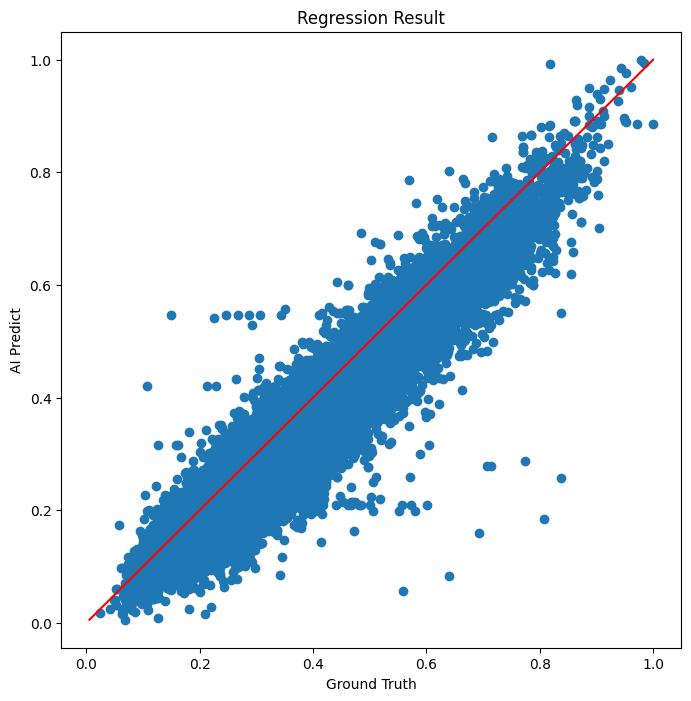

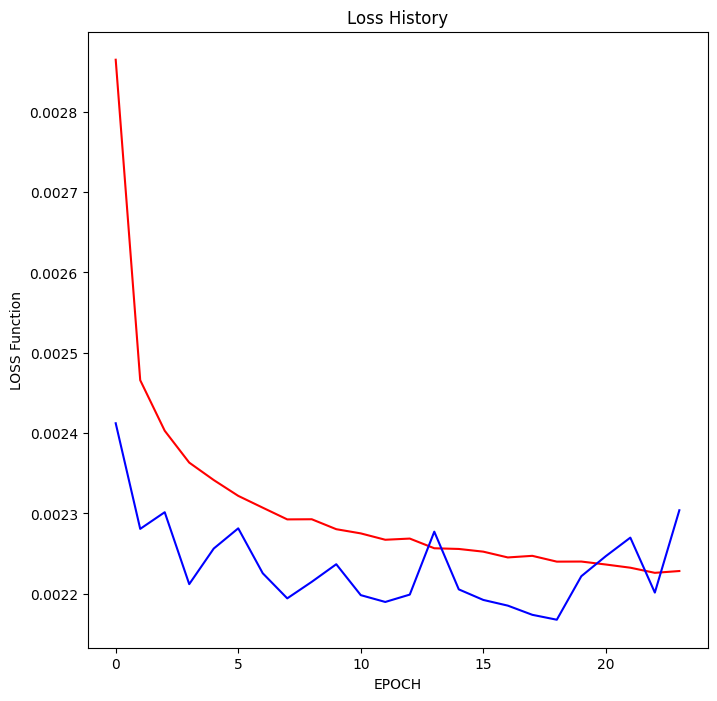

In [ ]:
draw_graph(model(test_X), test_y, history)

In [ ]:
#예측 예시(새로운 데이터 샘플)
#MinMaxScaler로 변환했다면, 예측 후 역변환하여 실제 값으로 변환해야
#사용자가 가슴둘레,팔둘레 등등 입력함
new_data_sample=np.array([[98,89.7,173,92,83,60,28,0]])  #가슴둘레, 팔둘레, 키, 허리둘레,엉덩이둘레, 머리둘레, 발길이 입력, 마지막 0넣은건 그 값은 제외하고 7개값만으로 예측함
prediction=predict_new_data(new_data_sample)
predictions=np.array([[0,0,0,0,0,0,0,prediction[0][0]]])
result=scaler.inverse_transform(predictions)   #역변환
print("예측 몸무게:",result[0][-1])  #몸무게 예측값

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
예측 몸무게: 76.69736848473549
